In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
from functions_for_simulation import *
from scipy.stats import chi2

In [22]:
## initializing

rowNum, colNum = (2000, 5)

Xs = Xs_generator(rowNum, colNum)
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1)
Ys_0 = Ys_generator(Xs, Ws_0)

tau = np.average(Ys_1['y']) - np.average(Ys_0['y'])
# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(tau))


The average treatment effect tau: 1.267


In [23]:
iterNum = 5000
diff_xT_xC = []
M_distance = []
for i in range(iterNum):

    Ws_equal_size = Ws_generator_equal_size(Xs)
    # print("Ws_equal_size: {0}".format(Ws_equal_size))
    diff_xT_xC.append(diff_T_C_calculator(Xs, Ws_equal_size))
    M = Mahalanobis_distance(Xs, Ws_equal_size)
    M_distance.append(M)
    # print("Mahalanobis_distance: {0}".format(M))

res1 = np.array(M_distance)
res2 = np.array(diff_xT_xC)

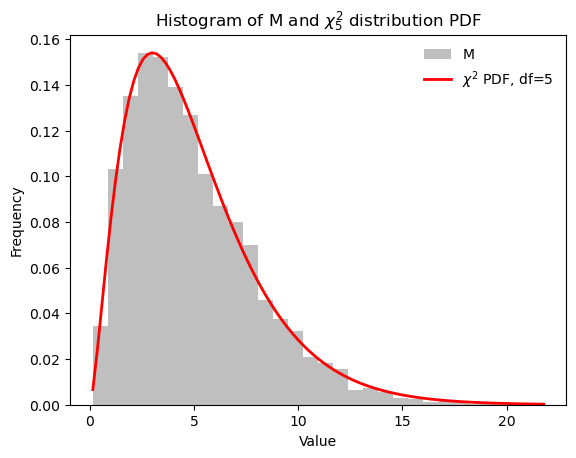

In [24]:
# 设置直方图和PDF图的x轴范围
xmin, xmax = min(res1), max(res1)
x = np.linspace(xmin, xmax, 100)

# 计算自由度为5的卡方分布的PDF
pdf = chi2.pdf(x, df=5)

# 绘制频数直方图，使用normed=True进行归一化，使其总面积等于1
plt.hist(res1, bins=30, density=True, alpha=0.5, color='grey', label='M')

# 绘制卡方分布的PDF
plt.plot(x, pdf, 'r-', lw=2, label=r'$\chi^2$ PDF, df=5')

# 添加图例和标签
plt.legend(loc='best', frameon=False)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of M and $\chi^2_5$ distribution PDF')

# 显示图形
plt.show()

In [28]:
iterNum = 5000
diff_xT_xC = []
for i in range(iterNum):

    # Ws_equal_size = Ws_generator_equal_size(Xs)
    diff_xT_xC.append(diff_T_C_calculator(Xs, Ws_equal_size))

# res = np.array(diff_xT_xC)
# plt.hist(res, bins=25)

x0    0.026425
x1    0.031743
x2    0.003648
x3   -0.038933
x4    0.097823
dtype: float64

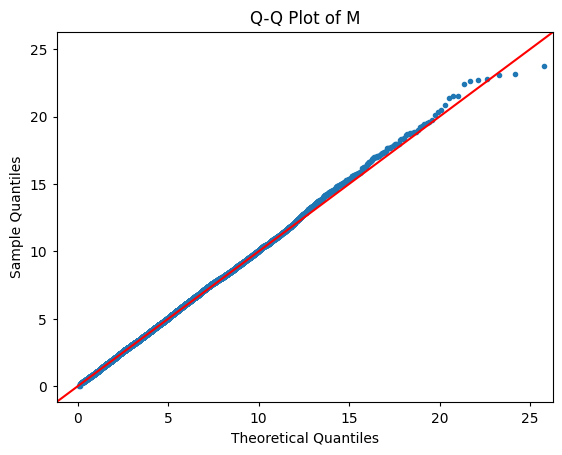

In [67]:
from scipy.stats import chi2
import statsmodels.api as sm

# 假设data是你想要检验的数组
# 例如，我们可以生成一个服从自由度为5的卡方分布的数组
# data = np.random.chisquare(df=5, size=1000)

# 使用scipy.stats的ppf函数来获取卡方分布的理论分位数
def theoretical_quantiles(sample):
    # 计算样本的经验分位数
    sample_quantiles = np.sort(sample)
    probabilities = np.arange(1, len(sample) + 1) / (len(sample) + 1)
    theoretical_q = chi2.ppf(probabilities, df=5)
    return theoretical_q, sample_quantiles

# 计算理论分位数和样本分位数
theor_q, sample_q = theoretical_quantiles(res)

# # 使用statsmodels的qqplot函数来创建QQ图，比较样本与理论分位数
# fig = sm.qqplot(res, dist=chi2, distargs=(5,), line='45', )
# plt.show()

# Generate a Q-Q plot
fig = sm.qqplot(res, dist=chi2, distargs=(5,), line='45')

# Set the size of the markers
plt.setp(fig.findobj(lambda x: hasattr(x, 'set_marker')), 'markersize', 3)
plt.title('Q-Q Plot of M')
# Display the result
plt.show()

In [68]:
from scipy.stats import chi2

# Degrees of freedom
df = 5
# CDF value
cdf_value = 0.8

# Find the quantile for the CDF value
x_value = chi2.ppf(cdf_value, df)

print(f'当卡方分布的自由度为{df}且CDF的值为{cdf_value}时，x的值约为{x_value:.2f}')

当卡方分布的自由度为5且CDF的值为0.8时，x的值约为7.29


In [86]:
from scipy.special import gammainc, gamma
def va_calculate(k, a):
    return 2/k * (gammainc(k/2+1, a/2) * gamma(k/2+1)) / (gammainc(k/2, a/2) * gamma(k/2))

def percent_reduction_in_variance(k, Pa):
    a = chi2.ppf(Pa, k)
    return 100*(1 - va_calculate(k, a))

def tau_percent_reduction_in_variance(k, Pa, R_sq):
    a = chi2.ppf(Pa, k)
    return 100*(1 - va_calculate(k, a))*R_sq

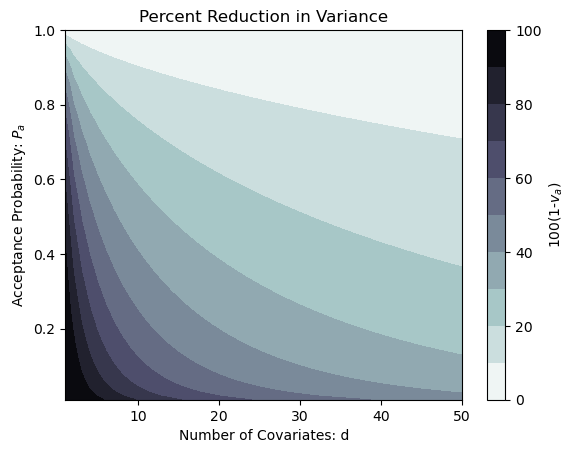

In [79]:
from matplotlib import cm

# Create a grid of points
x = np.linspace(1, 50, 50)
y = np.linspace(0.01, 1, 100)
X, Y = np.meshgrid(x, y)
Z = percent_reduction_in_variance(X, Y)

# Plot the surface
plt.figure()
cp = plt.contourf(X, Y, Z, cmap='bone_r', levels=np.linspace(0, 100, num=11))  # using a plain colormap, 'bone'
colorbar = plt.colorbar(cp) # Add a colorbar to a plot
colorbar.set_label(r'100(1-$v_a$)')
plt.xlabel('Number of Covariates: d')
plt.ylabel(r'Acceptance Probability: $P_a$')
plt.title('Percent Reduction in Variance')
# Show the plot
plt.show()

In [121]:
def PRIV_plot(R_sq, maxValue):
    from matplotlib import cm

    # Create a grid of points
    x = np.linspace(1, 50, 50)
    y = np.linspace(0.01, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = tau_percent_reduction_in_variance(X, Y, R_sq)

    # Plot the surface
    plt.figure()
    cp = plt.contourf(X, Y, Z, cmap='bone_r', levels=np.linspace(0, maxValue, num=11))  # using a plain colormap, 'bone'
    colorbar = plt.colorbar(cp) # Add a colorbar to a plot
    # colorbar.set_label(r'100(1-$v_a$)')
    plt.text(-0.7, 1.02, f'$R^2={R_sq}$', transform=colorbar.ax.transAxes, va='bottom', ha='left')
    plt.xlabel('Number of Covariates: d')
    plt.ylabel(r'Acceptance Probability: $P_a$')
    plt.title('Percent Reduction in Variance')
    # Show the plot
    plt.show()

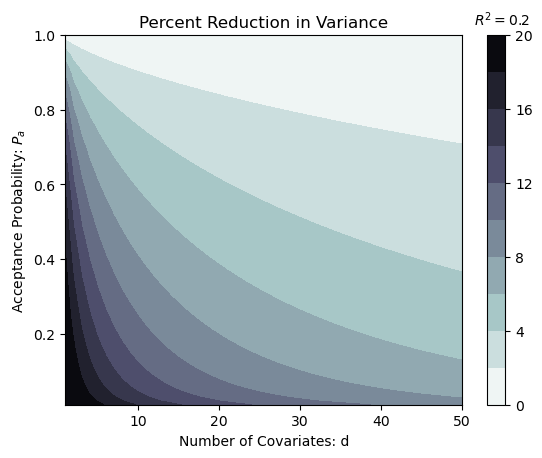

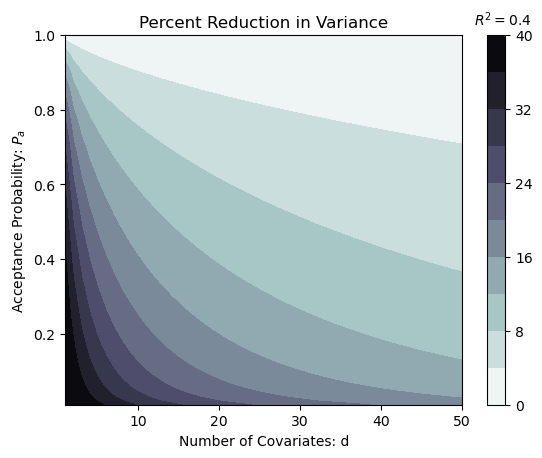

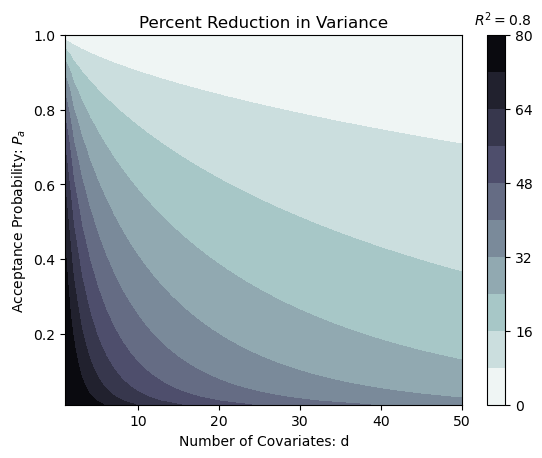

In [122]:
PRIV_plot(0.2, 20)
PRIV_plot(0.4, 40)
PRIV_plot(0.8, 80)

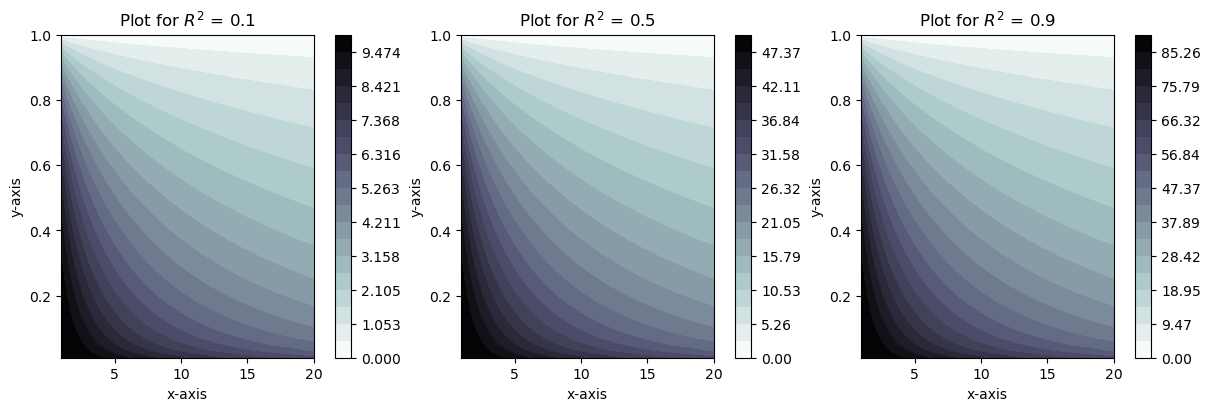

In [97]:
from mpl_toolkits.mplot3d import Axes3D
import math

# Create a grid of points
x = np.linspace(1, 20, 50)
y = np.linspace(0.01, 1, 50)
R_values = range(1, 10, 4)  # different R values

X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(nrows=1, ncols=len(R_values), figsize=(4*len(R_values), 4), constrained_layout=True)

for ax, R in zip(axs, R_values):
    Z = tau_percent_reduction_in_variance(X, Y, R/10)
    cp = ax.contourf(X, Y, Z, cmap='bone_r', levels=np.linspace(int(Z.min()), round(Z.max()), num=20))  # using a plain colormap, 'bone'
    fig.colorbar(cp, ax=ax)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_title(f'Plot for $R^2$ = {R/10}')

# Show the plot
plt.show()